### Data Cleaning and Exploration
1) Import the data & libraries. 
2) Explore the data to understand relationship between features and target as well as any outliers, noise, or errors that may adversely effect the model.
3) Clean Data: Remove or impute null values, remove or keep outliers, drop unused features 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf= pd.read_csv('../datasets/train.csv')
testdf= pd.read_csv('../datasets/test.csv')

In [3]:
traindf.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
testdf.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
#reviewing the dtype and non-null counts to get a feel for each column
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
traindf['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [7]:
traindf.isnull().sum().sum()

9822

In [8]:
testdf.isnull().sum().sum()

4171

In [9]:
testdf.shape

(878, 80)

In [10]:
traindf.shape

(2051, 81)

### Null Values 
As we cannot feed null values into our models I will first need to identify which houses are missing what values. Once the nulls are identified I can either fill or drop them. If I do fill null values I will need to determine what values to use (0, mean, mode, etc).

In [11]:
#Identify how many values are missing from each feature as well as what percentage of the feature is missing.
#Code leveraged from https://datascienceparichay.com/article/pandas-percentage-of-missing-values-in-each-column/
missing_values = traindf.isna().sum().reset_index()
missing_values.columns = ['feature','nulls']
missing_values['percent'] = round(missing_values['nulls'] / len(traindf), 2)
missing_values = missing_values[missing_values['nulls'] != 0].sort_values(by= 'nulls',ascending=False)
missing_values

,feature,nulls,percent
73,Pool QC,2042,1.00
75,Misc Feature,1986,0.97
7,Alley,1911,0.93
74,Fence,1651,0.80
58,Fireplace Qu,1000,0.49
4,Lot Frontage,330,0.16
60,Garage Yr Blt,114,0.06
65,Garage Cond,114,0.06
64,Garage Qual,114,0.06
61,Garage Finish,114,0.06


In [12]:
#Identify how many values are missing from each feature as well as what percentage of the feature is missing.
#Code leveraged from https://datascienceparichay.com/article/pandas-percentage-of-missing-values-in-each-column/
missing_values_test = testdf.isna().sum().reset_index()
missing_values_test.columns = ['feature','nulls']
missing_values_test['percent'] = round(missing_values_test['nulls'] / len(testdf), 2)
missing_values_test = missing_values_test[missing_values_test['nulls'] != 0].sort_values(by= 'nulls',ascending=False)
missing_values_test

,feature,nulls,percent
73,Pool QC,874,1.00
75,Misc Feature,837,0.95
7,Alley,820,0.93
74,Fence,706,0.80
58,Fireplace Qu,422,0.48
4,Lot Frontage,160,0.18
60,Garage Yr Blt,45,0.05
61,Garage Finish,45,0.05
64,Garage Qual,45,0.05
65,Garage Cond,45,0.05


In [13]:
#Fill Null Values with the mean of Lot Frontage, I don't want to drop as there are 330 rows but I also don't believe 0 is reasonable
traindf['Lot Frontage'].fillna(69, inplace=True)

In [14]:
#dropping features that have too many null values to be considered within the model
traindf.drop(columns=['Garage Yr Blt',
                       'Garage Cond',
                       'Garage Qual',
                       'Garage Finish',
                       'Garage Type',
                       'Pool QC', 
                       'Fence', 
                       'Misc Feature', 
                       'Alley', 
                       'Fireplace Qu'
                     ], inplace= True)

testdf.drop(columns=['Garage Yr Blt',
                       'Garage Cond',
                       'Garage Qual',
                       'Garage Finish',
                       'Garage Type',
                       'Pool QC', 
                       'Fence', 
                       'Misc Feature', 
                       'Alley', 
                       'Fireplace Qu'
                    ], inplace= True)

In [15]:
# #dropping features that have too many null values to be considered within the model
# traindf.drop(columns=['Pool QC', 'Fence', 'Misc Feature', 'Alley', 'Fireplace Qu'], inplace= True)

# #also drop columns for the testdf so that our data remains consistent
# testdf.drop(columns=['Pool QC', 'Fence', 'Misc Feature', 'Alley', 'Fireplace Qu'], inplace= True)

In [16]:
#Dropping the remaining null values so that the model can be fit on the training data
traindf.dropna(inplace=True)

In [17]:
#Impute Missing Values for the test data. For Lot Frontage I'll insert the mean from the train data
testdf['Lot Frontage'].loc[testdf['Lot Frontage'].isna()] = 68.71

C:\Users\dylan\AppData\Local\Temp\ipykernel_10524\1637032704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Lot Frontage'].loc[testdf['Lot Frontage'].isna()] = 68.71


In [18]:
#It looks like all these houses are likely missing basements as they all miss these basement features so I will replace the nulls with Not Applicables
testdf['Bsmt Cond'].replace(to_replace= np.nan, value='NA', inplace= True)
testdf['Bsmt Qual'].replace(to_replace= np.nan, value='NA', inplace= True)
testdf['Bsmt Exposure'].replace(to_replace= np.nan, value='NA', inplace= True)
testdf['BsmtFin Type 1'].replace(to_replace= np.nan, value='NA', inplace= True)
testdf['BsmtFin Type 2'].replace(to_replace= np.nan, value='NA', inplace= True)

In [19]:
#Fixing the null values for Veneer Type and Area
testdf['Mas Vnr Type'].replace(to_replace= np.nan, value='None', inplace= True)
testdf['Mas Vnr Area'].replace(to_replace= np.nan, value=0, inplace= True)

In [20]:
#Since 92% of the training data has Electrical of SBrkr I will use this to replace the null in test
traindf['Electrical'].value_counts(normalize= True)

SBrkr    0.917217
FuseA    0.065008
FuseF    0.014220
FuseP    0.003047
Mix      0.000508
Name: Electrical, dtype: float64

In [21]:
testdf['Electrical'].replace(to_replace= np.nan, value='SBrkr', inplace= True)

### Data Analysis & Handling Outliers
Here I will analyse the relationship between the target and feature variables to help me determine which features will drive the most accurate predictions. Further I will see if there are any outliers that might adversely impact the model.

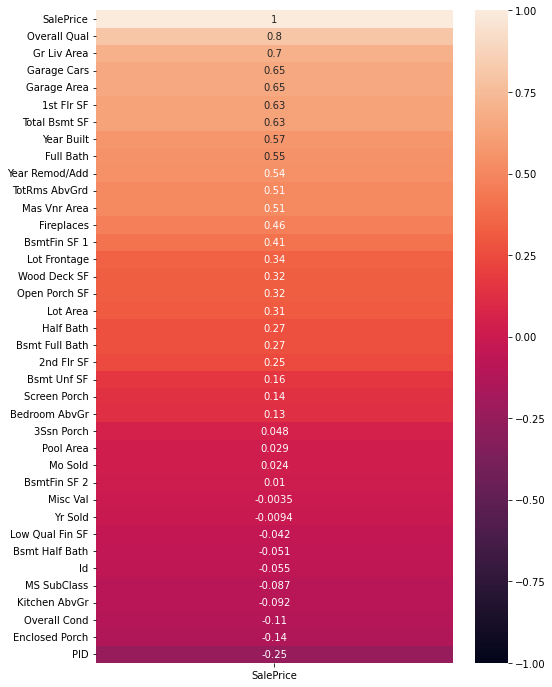

In [22]:
#Examining correlation between salesprice and features to identify which features have the strongest linear relationship with the target 
#Based on the correlations below I'll create a basic linear model using quality, square feet, garage, and room details.
plt.figure(figsize=(8,12))
sns.heatmap(traindf.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False),
            annot=True,
            vmin=-1,
            vmax=1,
           );

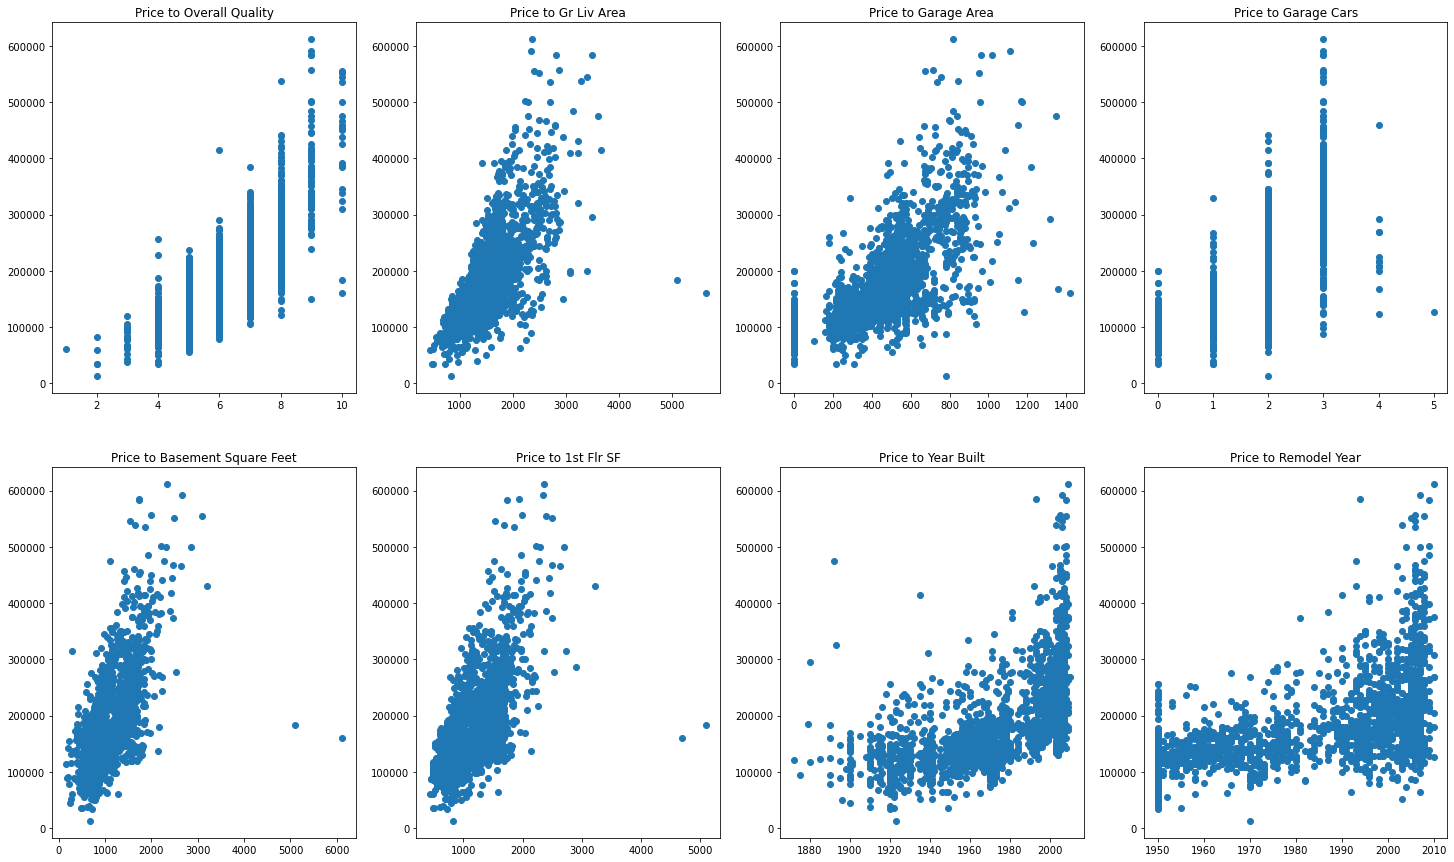

In [23]:
#Based on the correlation map above I chose some features to scatter to see if I can idenitfy any outliers that may adversely impact the model
#There appears to be two outliers with enormous square feet but relatively low Sale Price that may throw off the model.

plt.figure(figsize= (25,15))

ax1= plt.subplot(2,4,1) 
ax1.scatter(traindf['Overall Qual'], traindf['SalePrice'])
ax1.set_title('Price to Overall Quality')

ax2= plt.subplot(2,4,2)
ax2.scatter(traindf['Gr Liv Area'], traindf['SalePrice'])
ax2.set_title('Price to Gr Liv Area')

ax3= plt.subplot(2,4,3)
ax3.scatter(traindf['Garage Area'], traindf['SalePrice'])
ax3.set_title('Price to Garage Area')

ax4= plt.subplot(2,4,4)
ax4.scatter(traindf['Garage Cars'], traindf['SalePrice'])
ax4.set_title('Price to Garage Cars')

ax5= plt.subplot(2,4,5)
ax5.scatter(traindf['Total Bsmt SF'], traindf['SalePrice'])
ax5.set_title('Price to Basement Square Feet')

ax6= plt.subplot(2,4,6)
ax6.scatter(traindf['1st Flr SF'], traindf['SalePrice'])
ax6.set_title('Price to 1st Flr SF')

ax7= plt.subplot(2,4,7)
ax7.scatter(traindf['Year Built'], traindf['SalePrice'])
ax7.set_title('Price to Year Built')

ax8= plt.subplot(2,4,8)
ax8.scatter(traindf['Year Remod/Add'], traindf['SalePrice'])
ax8.set_title('Price to Remodel Year');

plt.savefig('../img/scatters.png')

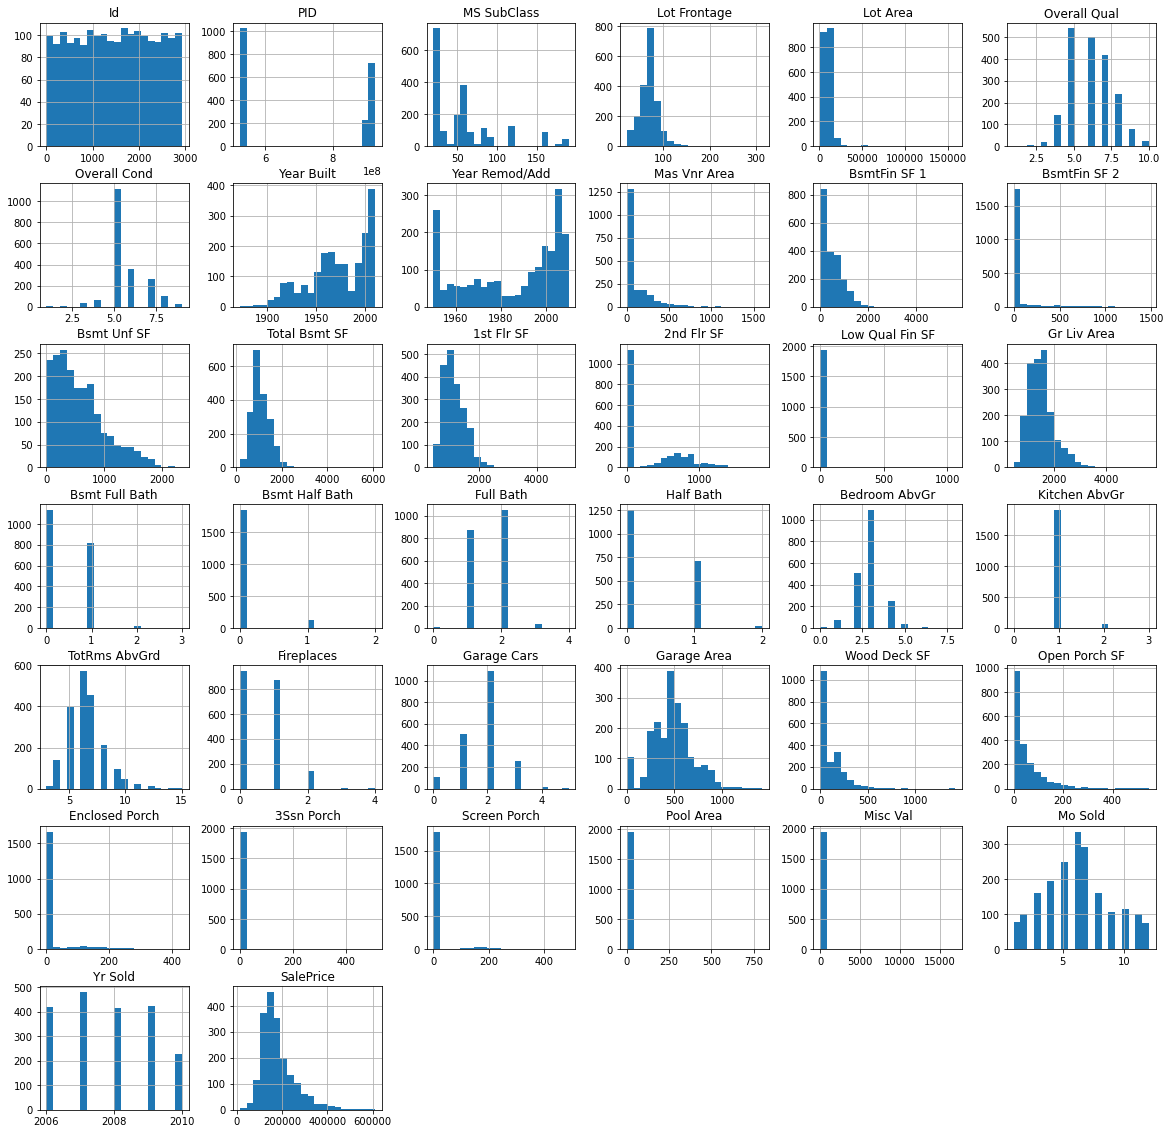

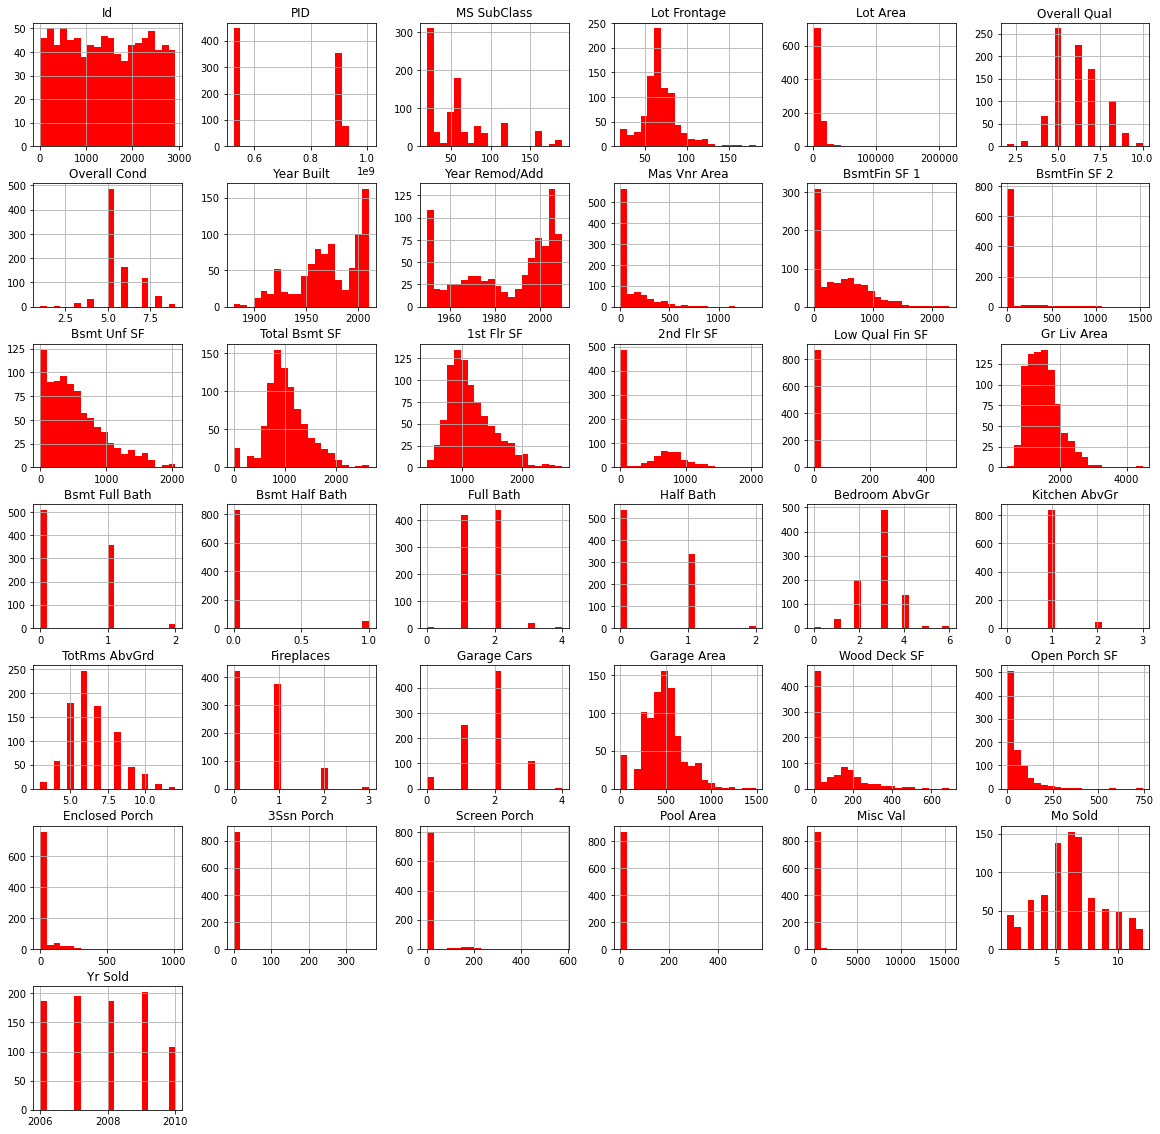

In [24]:
#A few things that stand out to me are that many of these features in the second to last row (Porch, Pool Area, etc) appear to have little to no represenation within the dataset
#I don't think these features will add much value to the model. I also want to create a few columns when I feature engineer to sum up all the bathrooms and square footage
traindf.hist(figsize= (20,20), bins= 20)
testdf.hist(figsize= (20,20), bins = 20, color= 'r');

In [25]:
#remove the outliers whose Sale Price was extermely low given square feet and overall quality
traindf= traindf[traindf['Gr Liv Area'] < 4000]
traindf= traindf.drop(labels=[125])

In [26]:
testdf.shape

(878, 70)

In [27]:
traindf.shape

(1966, 71)

### Save the Data

In [28]:
#Save DataFrames so that I can use these in other notebooks
#Code leveraged from https://stackoverflow.com/questions/31621414/share-data-between-ipython-notebooks
%store traindf
%store testdf

Stored 'traindf' (DataFrame)
Stored 'testdf' (DataFrame)
